In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

df = pd.read_excel('extractedData1.xlsx', sheet_name='Sheet1')

scale = (df - df.mean()) / df.std()

print(scale)  # Check scale

print("Type of input data is:", type(df))
print("Size of input data = ", np.shape(df))

pca = PCA()
pca.fit(scale)
feature_vector = pca.components_
contri_rate = pca.explained_variance_ratio_
print(contri_rate)

pca = PCA(n_components=2)  # 2D PCA
pca.fit(scale)
df_opt = pca.transform(scale)

with pd.ExcelWriter('PCAresult.xlsx') as writer:
    pd.DataFrame(df_opt).to_excel(writer, sheet_name='PCs')
    pd.DataFrame(contri_rate).to_excel(writer, sheet_name='Contribution rates')
    pd.DataFrame(feature_vector).to_excel(writer, sheet_name='Feature vector')
    pd.DataFrame(scale).to_excel(writer, sheet_name='Standard data')

     1.38E-01  6.29E-02  7.78E-01  1.30E-01  2.64E-01  3.42E+00  2.63E+00  \
0    4.838605  4.091116  3.410422  5.034742  5.027014  3.042905  3.080594   
1    4.657923  3.746584  3.309785  4.825200  4.826383  3.015543  2.977968   
2    4.597695  3.943460  3.171411  4.755353  4.726068  2.988181  2.977968   
3    4.537468  3.746584  3.033036  4.755353  4.675910  2.988181  3.029281   
4    4.537468  3.648147  2.869502  4.615658  4.575595  2.960818  3.029281   
..        ...       ...       ...       ...       ...       ...       ...   
673 -0.618007  0.990329  1.259324 -0.671792 -0.590648 -1.034077 -1.229695   
674 -0.599939  1.236424  1.234165 -0.643853 -0.540490 -1.034077 -1.229695   
675 -0.624030  1.236424  1.271904 -0.643853 -0.540490 -1.061439 -1.229695   
676 -0.618007  1.433299  1.209006 -0.608929 -0.490332 -1.034077 -1.229695   
677 -0.605962  1.531737  1.284484 -0.615914 -0.540490 -1.034077 -1.229695   

     3.42E+00.1  2.84E+00  
0      1.665720  2.765865  
1      1.665720  2.

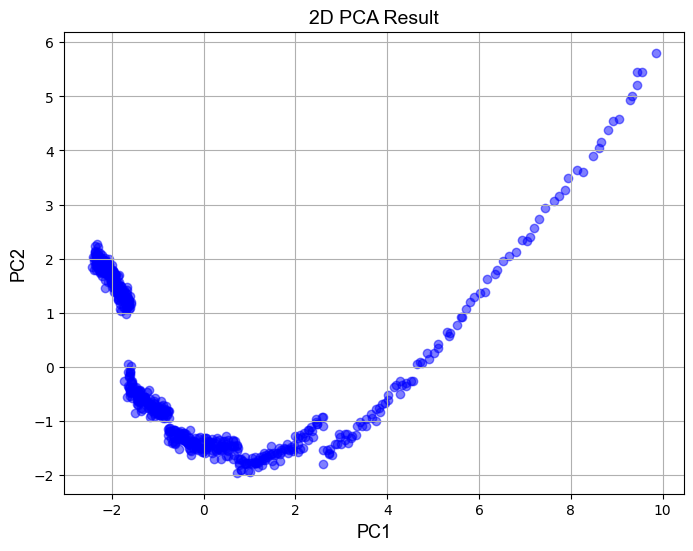

In [16]:
import matplotlib.pyplot as plt

# Assuming df_opt contains the transformed PCA data
x = df_opt[:, 0]
y = df_opt[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', alpha=0.5)

# Add labels and title
plt.xlabel('PC1', fontname='Arial', fontsize=13)
plt.ylabel('PC2', fontname='Arial', fontsize=13)
plt.title('2D PCA Result', fontname='Arial', fontsize=14)

plt.grid(True)
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('PCAresult.xlsx')

# Check if 'Label' column exists
if 'Label' not in data.columns:
    print("Error: 'Label' column not found")
else:
    # Extract the x and y data
    x = data[0]
    y = data[1]

    # Define color map
    label_color_map = {'Ace_0_rh0': '#F2E6E6', 'Ace_20_rh0': '#E1C4C4', 'Ace_50_rh0': '#CF9E9E', 
                       'Ace_100_rh0': '#B87070', 'Ace_500_rh0': '#984B4B', 'Ace_1000_rh0': '#743A3A',
                       'FA_0_rh0': '#F2E6E6', 'FA_20_rh0': '#E1C4C4', 'FA_50_rh0': '#CF9E9E', 
                       'FA_100_rh0': '#B87070', 'FA_500_rh0': '#984B4B', 'FA_1000_rh0': '#743A3A',
                       'Eth_0_rh0': '#F2E6E6', 'Eth_20_rh0': '#E1C4C4', 'Eth_50_rh0': '#CF9E9E', 
                       'Eth_100_rh0': '#B87070', 'Eth_500_rh0': '#984B4B', 'Eth_1000_rh0': '#743A3A'}

    # Filter data with valid labels
    included_labels = [i for i in range(len(data)) if data['Label'][i] in label_color_map]
    colors = [label_color_map[data['Label'][i]] for i in included_labels]

    plt.figure(figsize=(5, 4))

    # Plot scatter
    plt.scatter(x[included_labels], y[included_labels], c=colors)

    # Add labels and title
    plt.xlabel('PC1', fontname='Arial', fontsize=13)
    plt.ylabel('PC2', fontname='Arial', fontsize=13)
    plt.title('PCA of Acetone, RH=60%', fontname='Arial', fontsize=14)

    # Create legend
    handles = []
    labels = []
    for label in label_color_map:
        if label in data['Label'].values:
            handles.append(plt.scatter([], [], c=label_color_map[label], label=label))
            labels.append(label)
    plt.legend(handles=handles, labels=labels, loc=2, prop={'family': 'Arial', 'size': 8.5})
    plt.xticks(fontname='Arial', fontsize=11)
    plt.yticks(fontname='Arial', fontsize=11)

    plt.xlim((-15.1, 15.1))
    plt.ylim((-3, 6.1))
    #plt.savefig('rh0', dpi=500)
    plt.show()

Error: 'Label' column not found


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# File names
file_names = [
    'extractedData1.xlsx',
    'extractedData2.xlsx',
    'extractedData3.xlsx',
    'extractedData4.xlsx',
    'extractedData5.xlsx',
    'extractedData6.xlsx'
]

# Store all data
all_data = []

# Read and standardize data
for file in file_names:
    df = pd.read_excel(file, sheet_name='Sheet1')
    # Fill NaN with column mean and standardize
    df = df.fillna(df.mean())
    scale = (df - df.mean()) / df.std()
    all_data.append(scale)

# Combine all data
combined_data = pd.concat(all_data, keys=range(len(file_names)))

# Remove potential NaNs after scaling
combined_data = combined_data.fillna(0)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Add PCA results to DataFrame
combined_data['PC1'] = pca_result[:, 0]
combined_data['PC2'] = pca_result[:, 1]

# Plotting
plt.figure(figsize=(10, 8))
labels = ['Data1', 'Data2', 'Data3', 'Data4', 'Data5', 'Data6']
colors = ['b', 'g', 'r', 'c', 'm', 'y']

for i, label in enumerate(labels):
    subset = combined_data.xs(i)
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.5, c=colors[i])

# Add labels and title
plt.xlabel('PC1', fontname='Arial', fontsize=13)
plt.ylabel('PC2', fontname='Arial', fontsize=13)
plt.title('2D PCA of Sensor Data', fontname='Arial', fontsize=14)
plt.legend(title='Data Sets')
plt.grid(True)
plt.show()

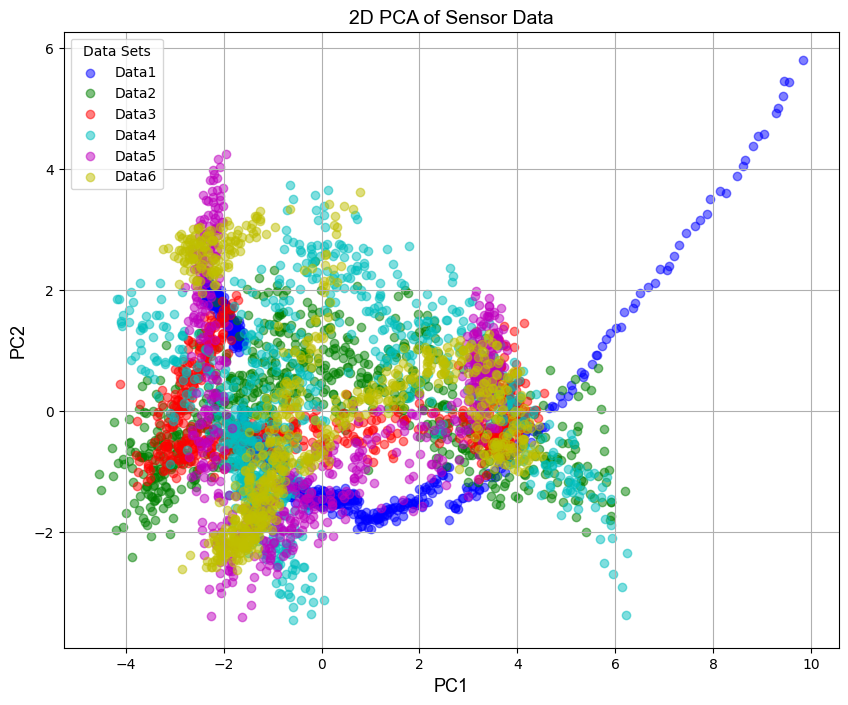

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# File names
file_names = ['extractedData1.xlsx', 
              'extractedData2.xlsx', 
    'extractedData3.xlsx',  
    'extractedData4.xlsx',
    'extractedData5.xlsx',
    'extractedData6.xlsx'
]

# Plotting setup
plt.figure(figsize=(10, 8))
labels = ['Data1', 'Data2', 'Data3', 'Data4', 'Data5', 'Data6']
colors = ['b', 'g', 'r', 'c', 'm', 'y']

for i, file in enumerate(file_names):
    # Read and standardize data
    df = pd.read_excel(file, sheet_name='Sheet1')
    df = df.fillna(df.mean())  # Fill NaN with column mean
    scale = (df - df.mean()) / df.std()

    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scale)

    # Plotting each dataset
    plt.scatter(pca_result[:, 0], pca_result[:, 1], label=labels[i], alpha=0.5, c=colors[i])

# Add labels and title
plt.xlabel('PC1', fontname='Arial', fontsize=13)
plt.ylabel('PC2', fontname='Arial', fontsize=13)
plt.title('2D PCA of Sensor Data', fontname='Arial', fontsize=14)
plt.legend(title='Data Sets')
plt.grid(True)
plt.show()

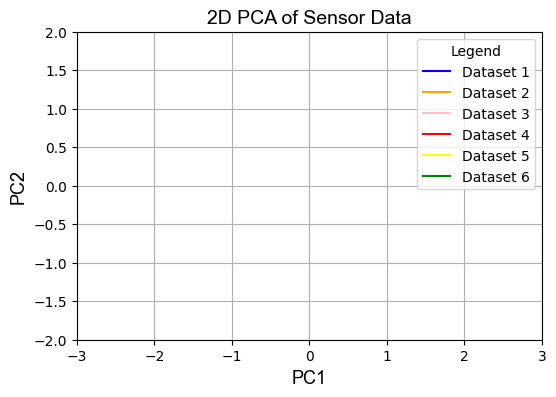

In [8]:
import matplotlib.pyplot as plt

# 创建一个空图像
plt.figure(figsize=(6, 4))

# 添加图例元素（即使没有数据点）
# 通过 `plt.plot` 创建空的图例项
plt.plot([], [], label="Dataset 1", color="blue")  # 空数据集1
plt.plot([], [], label="Dataset 2", color="orange")
plt.plot([], [], label="Dataset 3", color="pink")
plt.plot([], [], label="Dataset 4", color="red")
plt.plot([], [], label="Dataset 5", color="yellow")
plt.plot([], [], label="Dataset 6", color="green")# 空数据集2

plt.xlim(-3, 3)  # X 轴范围从 -10 到 10
plt.ylim(-2, 2)

# 添加图例
plt.legend(title="Legend", loc="upper right")  # 图例标题和位置

# 设置轴标签和标题（可选）
plt.xlabel('PC1', fontname='Arial', fontsize=13)
plt.ylabel('PC2', fontname='Arial', fontsize=13)
plt.title('2D PCA of Sensor Data', fontname='Arial', fontsize=14)

# 显示网格（可选）
plt.grid(True)

# 显示图像
plt.show()